In [1]:
# UNIVERSIDAD LATINA DE PANAMÁ - 2024-1 / INTELIGENCIA ARTIFICIAL

#Laboratorio No.3
#GRUPO 1

In [2]:
# Instalamos esta dependencia que es necesaria en un punto
!pip install pillow
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [3]:
#Listado de Librerías

import pandas as pd
import numpy as np
import os
import tempfile
import PIL

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from urllib.request import urlretrieve
from zipfile import ZipFile
from PIL import Image 
from numpy.random import randint

In [5]:
# Para tener repitividad en los resultados generados

np.random.seed(42)

# Creamos un directorio temporal
d = tempfile.mkdtemp()

# Definimos el URL
url = 'https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set'

# Tenemos la data
fn, info = urlretrieve(url, os.path.join(d, 'One-hundred plant species leaves data set'))

In [6]:
print("[INFO] Creada carpeta temporal en:", fn)
print("[INFO] Mi directorio actual de trabajo es:", os.getcwd())

[INFO] Creada carpeta temporal en: C:\Users\itche\AppData\Local\Temp\tmps6yfp5w5\One-hundred plant species leaves data set
[INFO] Mi directorio actual de trabajo es: C:\Users\itche\Documents\ULat\IA


In [7]:
#Separación de las imágenes a utilizar del dataset

img_predict= 'Hojas de Referencia'
jpeglist = os.listdir(img_predict)

i = 0
with open('labels.txt', 'w') as lbl:
    for _r in jpeglist:
        i = i + 1
        if i <= 66:
            leafclass = 0
        if i > 66 and i <= 126:
            leafclass = 1
        if i > 126:
            leafclass = 2
        lbl.write(str(leafclass) + '\n')
lbl.close()

In [8]:
## I. LEAF DATASET:

#Conteo de la cantidad de imágenes a utilizar

target = np.genfromtxt('labels.txt').astype(np.uint8)
target.shape

(300,)

In [9]:
#Primer procesamiento de imágenes 

w       = 1000
h       = 1000
nimages = 300
nchan   = 3

imgarr   = np.zeros((w*h*nchan, nimages), dtype=np.uint8)

for index, filename in enumerate(os.listdir(img_predict)):
    img = PIL.Image.open(os.path.join(img_predict, filename))
    pixels = np.array(img).reshape(w*h*nchan)
    imgarr[:, index] = pixels
    

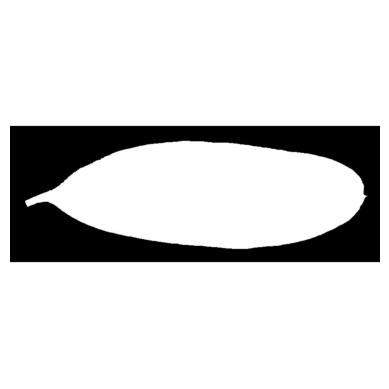

In [11]:
# Hoja Aleatoria

some_leaf = imgarr[:, randint(0, 300)].reshape(1000, 1000, 3)
plt.imshow(some_leaf)
plt.axis("off")

plt.show()

In [12]:
# Por convenencia dividimos en clases iguales.

X = imgarr
Y = target
Y = np.hstack((Y[:100], Y[100:]))
X = np.hstack((X[:, :100], X[:, 100:]))
X.shape, Y.shape

((3000000, 300), (300,))

In [13]:
# Dividimos ahora el training set y el test set
nimginclass = 100
train = int(0.8*100)
test = 100 - train

# De 0 a 50, la segunda de 100 a 150 y la ultima de 200 a 250
# De 50 a 100 imagenes de test y de 150 a 200 test y de 250 a 300 es test

Xtrain = np.hstack((X[:,   :50], X[:, 100:(100+50)], X[:, 200:(200+50)]))/255
Ytrain = np.hstack((Y[:50], Y[100:(100+50)], Y[200:(200+50)]))

Xtest  = np.hstack((X[:, 50:(50+50)], X[:, (100+50):(100+50+50)], X[:, (200+50):]))/255
Ytest  = np.hstack((Y[50:(50+50)], Y[(100+50):(100+50+50)], Y[(200+50):]))

#Imprimimos las divisiones como verificación 

Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((3000000, 150), (3000000, 150), (150,), (150,))

In [14]:
#II. Clasificación Multiclase

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(Xtrain.T, Ytrain)

C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

In [15]:
#Impresión de las predicciones 

Ypredict = sgd_clf.predict(Xtest.T)
Ypredict, Ytest

(array([2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2,
        1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2,
        0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [16]:
#Ahora utilizaremos una métrica para el rendimiento de la predicción 
#Esta función evalua el modelo utilizado usando validación cruzada con k-fold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for xindex, yindex in kfold.split(Xtrain.T, Ytrain):
    clonemodel  = clone(sgd_clf)
    Xtrainfold = Xtrain.T[xindex]
    Ytrainfold = (Ytrain[xindex])
    Xtestfold  = Xtrain.T[yindex]
    Ytestfold  = (Ytrain[yindex])

    clonemodel.fit(Xtrainfold, Ytrainfold)
    prediction = clonemodel.predict(Xtestfold)
    numok = sum(prediction == Ytestfold)
    print(numok / len(prediction))

C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.88


C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.88


C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8


In [17]:
#Visto con la métrica de cross_validation

cross_val_score(sgd_clf, Xtrain.T, Ytrain, cv=3, scoring="accuracy")

C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.26, 0.48, 0.58])

In [18]:
#Evaluación del modelo en base a la matriz de confusión.

from sklearn.metrics import confusion_matrix

Ypredictions = cross_val_predict(sgd_clf, Xtrain.T, Ytrain, cv=3)

confMat = confusion_matrix(Ytrain, Ypredictions)
confMat

C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\itche\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[21, 24,  5],
       [ 5, 11, 10],
       [27, 13, 34]], dtype=int64)

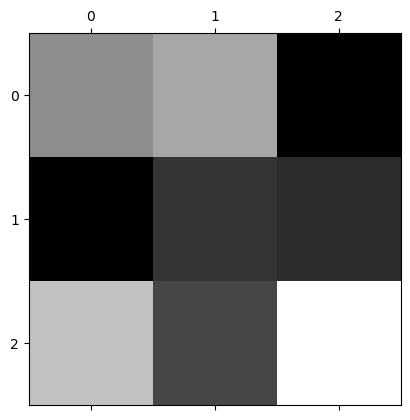

In [19]:
#Procesamiento de de los colores

plt.matshow(confMat, cmap=plt.cm.gray)
plt.show()

In [20]:
#MClasificar binariamente

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_score(Ytrain, Ypredictions, average='micro')

0.44

In [21]:
recall_score(Ytrain, Ypredictions, average='micro')

0.44

In [22]:
f1_score(Ytrain, Ypredictions, average='micro')

0.44